In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = sns.load_dataset('titanic')
# ----------------------------------
df = df.drop('deck', axis=1)
df = df.drop('adult_male', axis=1)
df = df.drop('pclass', axis=1)
df = df.drop('sibsp', axis=1)
df = df.drop('embarked', axis=1)
df = df.drop('parch', axis=1)
df = df.drop('survived', axis=1)
df = df.drop('who', axis=1)
# ----------------------------------


df['sex'] = df['sex'].replace("male",1)
df['sex'] = df['sex'].replace("female",0)


# -----------------------------------

df['class'] = df['class'].replace("First",1)
df['class'] = df['class'].replace("Second",2)
df['class'] = df['class'].replace("Third",3)

# ------------------------------------

df['embark_town'] = df['embark_town'].replace("Southampton",1)
df['embark_town'] = df['embark_town'].replace("Cherbourg",2)
df['embark_town'] = df['embark_town'].replace("Queenstown",3)

# ------------------------------------

df['alive'] = df['alive'].replace("yes",1)
df['alive'] = df['alive'].replace("no",0)

# ------------------------------------

df['alone'] = df['alone'].replace("True",1)
df['alone'] = df['alone'].replace("False",0)

# ------------------------------------

df = df.dropna()
df.isnull().sum()
df.tail()

In [4]:
x = df[['sex', 'age', 'fare', 'class', 'embark_town', 'alone']]
y = df['alive']

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)
model.predict([[0,18,255,2,3,1]])

/home/ahmad/.local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [16]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [18]:
prediction = model.predict(x_test)
score = model.score(x_test,y_test)
score

0.993006993006993

In [19]:
print(metrics.accuracy_score(y_test, prediction))

0.993006993006993


In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[85  1]
 [ 0 57]]


Text(0.5, 1.0, 'accuracy_score: 0.993006993006993')

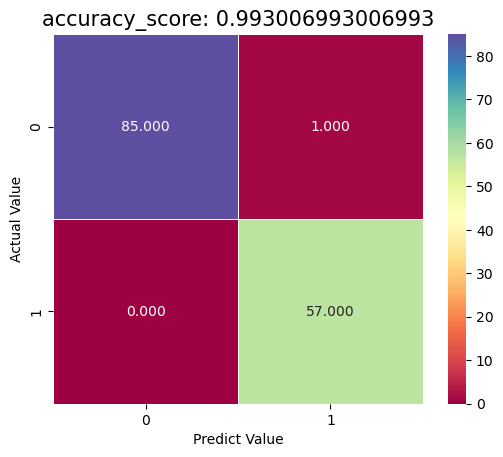

In [29]:
# Plotting
plt.Figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Spectral');
plt.xlabel("Predict Value");
plt.ylabel("Actual Value");
all_sample_title = 'accuracy_score: {0}'.format(score)
plt.title(all_sample_title, size =15)